In [83]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [84]:
class layer:
    def __init__(self, inputs, in_size, out_size, activation_function=None):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size]))
        self.b = tf.Variable(tf.zeros([1,out_size]))
        self.Wx_plus_b = tf.matmul(inputs, self.W) + self.b
#         self.activation_function = activation_function
    def output(self, activation_function=None):
        if activation_function == None:
            result = self.Wx_plus_b
        else :
            result = activation_function(self.Wx_plus_b)
        return result

In [119]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)

# layer1 = layer(x, 784, 100, tf.nn.sigmoid)
# layer2 = layer(layer1.output(), 100, 10, tf.nn.softmax)

layer1 = layer(xs, 784, 100)
# layer2 = layer(layer1.output(tf.nn.sigmoid), 100, 10)
layer2 = layer(layer1.output(tf.nn.sigmoid), 100, 10)
layer3 = layer(layer2.output(tf.nn.sigmoid), 10, 2)
layer4 = layer(layer3.output(tf.nn.sigmoid), 2, 10)
layer5 = layer(layer4.output(tf.nn.sigmoid), 10, 100)
# layer5 = layer(layer2.output(tf.nn.sigmoid), 10, 100)
# layer6 = layer(layer1.output(tf.nn.sigmoid), 100, 784)
layer6 = layer(layer5.output(tf.nn.sigmoid), 100, 784)

# layer1 = layer(xs, 784, 300)
# layer2 = layer(layer1.output(tf.nn.sigmoid), 300, 100)
# layer3 = layer(layer2.output(tf.nn.sigmoid), 100, 30)
# layer4 = layer(layer3.output(tf.nn.sigmoid), 30, 10)
# layer5 = layer(layer4.output(tf.nn.sigmoid), 10, 2)
# layer6 = layer(layer5.output(tf.nn.sigmoid), 2, 10)
# layer7 = layer(layer6.output(tf.nn.sigmoid), 10, 30)
# layer8 = layer(layer7.output(tf.nn.sigmoid), 30, 100)
# layer9 = layer(layer8.output(tf.nn.sigmoid), 100, 300)
# layer10 = layer(layer9.output(tf.nn.sigmoid), 300, 784)


# layer1 = layer(xs, 784, 100)
# # layer2 = layer(layer1.output(tf.nn.relu), 100, 2)
# layer2 = layer(layer1.output(tf.nn.relu), 100, 20)
# layer3 = layer(layer2.output(tf.nn.relu), 20, 2)
# layer4 = layer(layer3.output(tf.nn.relu), 2, 20)
# layer5 = layer(layer4.output(tf.nn.relu), 20, 100)
# # layer5 = layer(layer4.output(tf.nn.relu), 2, 100)
# layer6 = layer(layer5.output(tf.nn.relu), 100, 784)

loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer6.output(tf.nn.sigmoid)))
# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.sigmoid)))
# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer6.output(tf.nn.relu)))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=layer2))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=prediction))
# loss_ae = tf.reduce_mean(tf.square(xs-layer6.output(tf.nn.relu)))
# loss_ae = tf.reduce_mean(tf.squared_difference(x=xs, y=layer6.output(tf.nn.relu)))



# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
# train_step_ae = tf.train.RMSPropOptimizer(0.05).minimize(loss_ae)
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
# train_step = tf.train.RMSPropOptimizer(0.01).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss)
# train_step_ae = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss_ae)
train_step_ae = tf.train.AdamOptimizer(0.005).minimize(loss_ae)


# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [120]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])



epoch:  0  , loss:  0.630318
epoch:  5  , loss:  0.625353
epoch:  10  , loss:  0.624477
epoch:  15  , loss:  0.623636
epoch:  20  , loss:  0.623612
epoch:  25  , loss:  0.623592
epoch:  30  , loss:  0.623518
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


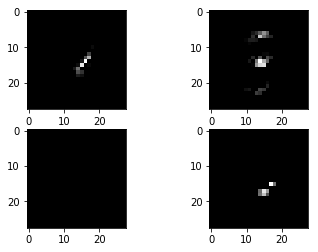

In [121]:
#Autoencoder
for epoch in range(31):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.relu), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.relu), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

epoch:  0  , loss:  0.623536
epoch:  5  , loss:  0.623378
epoch:  10  , loss:  0.623436
epoch:  15  , loss:  0.623499
epoch:  20  , loss:  0.623385
epoch:  25  , loss:  0.623231
epoch:  30  , loss:  0.623142
epoch:  35  , loss:  0.623343
epoch:  40  , loss:  0.623293
epoch:  45  , loss:  0.623155
epoch:  50  , loss:  0.62323
epoch:  55  , loss:  0.623262
epoch:  60  , loss:  0.623079
epoch:  65  , loss:  0.623008
epoch:  70  , loss:  0.62299
epoch:  75  , loss:  0.623005
epoch:  80  , loss:  0.623026
epoch:  85  , loss:  0.622973
epoch:  90  , loss:  0.622937
epoch:  95  , loss:  0.622849
epoch:  100  , loss:  0.622823
[[  9.76086920e-11   2.49860854e-10   4.12187263e-11 ...,   8.59610820e-12
    1.05445791e-10   1.04047339e-13]
 [  8.38089098e-10   2.07088018e-08   5.49769674e-10 ...,   1.07045255e-10
    7.91067922e-09   1.27060620e-08]
 [  6.39752626e-11   2.52796378e-11   2.58849137e-10 ...,   4.45660753e-09
    7.68031194e-11   5.60357587e-13]
 [  3.06329268e-10   8.34939617e-10  

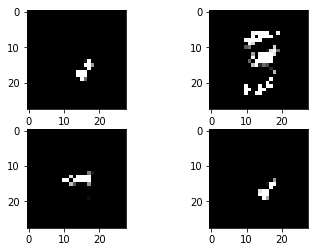

In [123]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')
        
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

epoch:  0  , loss:  0.622956
epoch:  5  , loss:  0.622956
epoch:  10  , loss:  0.622986
epoch:  15  , loss:  0.62291
epoch:  20  , loss:  0.622849
epoch:  25  , loss:  0.622807
epoch:  30  , loss:  0.622978
epoch:  35  , loss:  0.622923
epoch:  40  , loss:  0.622897
epoch:  45  , loss:  0.622852
epoch:  50  , loss:  0.622844
epoch:  55  , loss:  0.622872
epoch:  60  , loss:  0.622952
epoch:  65  , loss:  0.622809
epoch:  70  , loss:  0.623101
epoch:  75  , loss:  0.622805
epoch:  80  , loss:  0.622739
epoch:  85  , loss:  0.622901
epoch:  90  , loss:  0.622735
epoch:  95  , loss:  0.622836
epoch:  100  , loss:  0.622775
[[  3.50300979e-14   9.24774840e-12   4.32348927e-13 ...,   1.74604905e-12
    8.73857497e-12   9.70338515e-14]
 [  2.69623490e-10   5.88563998e-09   2.47248222e-10 ...,   1.51710138e-11
    7.10085901e-09   1.10871810e-08]
 [  1.04176919e-11   3.53869950e-12   5.13932126e-11 ...,   4.09225626e-10
    2.98031543e-12   2.50238198e-13]
 [  2.17454596e-10   1.02997499e-09 

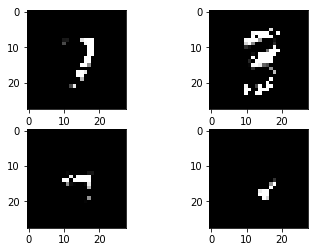

In [144]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')
        
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

epoch:  0  , loss:  0.622817
epoch:  5  , loss:  0.622855
epoch:  10  , loss:  0.623067
epoch:  15  , loss:  0.622802
epoch:  20  , loss:  0.622863
epoch:  25  , loss:  0.622787
epoch:  30  , loss:  0.622924
epoch:  35  , loss:  0.622856
epoch:  40  , loss:  0.622841
epoch:  45  , loss:  0.622836
epoch:  50  , loss:  0.622807
epoch:  55  , loss:  0.622938
epoch:  60  , loss:  0.622767
epoch:  65  , loss:  0.622958
epoch:  70  , loss:  0.622891
epoch:  75  , loss:  0.622713
epoch:  80  , loss:  0.622932
epoch:  85  , loss:  0.622637
epoch:  90  , loss:  0.622703
epoch:  95  , loss:  0.622744
epoch:  100  , loss:  0.622699
epoch:  105  , loss:  0.622628
epoch:  110  , loss:  0.622784
epoch:  115  , loss:  0.622667
epoch:  120  , loss:  0.622686
epoch:  125  , loss:  0.622773
epoch:  130  , loss:  0.622647
epoch:  135  , loss:  0.622622
epoch:  140  , loss:  0.622707
epoch:  145  , loss:  0.622765
epoch:  150  , loss:  0.622619
epoch:  155  , loss:  0.622753
epoch:  160  , loss:  0.62268


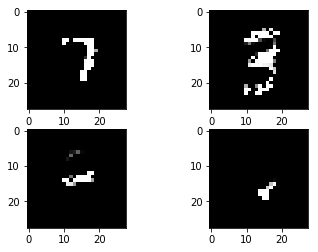

In [147]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')
        
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

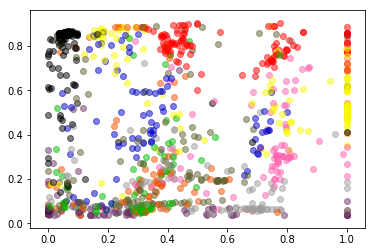

In [145]:
nums_scatter = sess.run(layer3.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=.5)

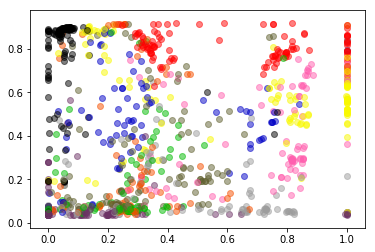

In [148]:
nums_scatter = sess.run(layer3.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=.5)

epoch:  0  , loss:  0.62263
epoch:  5  , loss:  0.622544
epoch:  10  , loss:  0.622561
epoch:  15  , loss:  0.622688
epoch:  20  , loss:  0.622494
epoch:  25  , loss:  0.62259
epoch:  30  , loss:  0.622656
epoch:  35  , loss:  0.622533
epoch:  40  , loss:  0.622613
epoch:  45  , loss:  0.622585
epoch:  50  , loss:  0.62263
epoch:  55  , loss:  0.622802
epoch:  60  , loss:  0.622687
epoch:  65  , loss:  0.622553
epoch:  70  , loss:  0.622566
epoch:  75  , loss:  0.622648
epoch:  80  , loss:  0.622581
epoch:  85  , loss:  0.622507
epoch:  90  , loss:  0.622622
epoch:  95  , loss:  0.622662
epoch:  100  , loss:  0.622734
[[  2.58278366e-15   1.56787604e-12   6.41938353e-14 ...,   1.01230115e-15
    6.14681916e-12   1.28125741e-13]
 [  7.67467409e-11   1.31459699e-09   1.21649413e-10 ...,   3.24385115e-12
    3.94625754e-09   1.70923542e-09]
 [  4.58010713e-12   3.17819837e-12   1.26667218e-11 ...,   7.83916057e-11
    5.46978207e-13   1.61164268e-13]
 [  1.09226664e-11   2.14127382e-10   

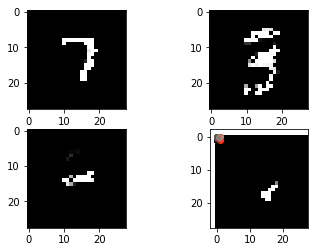

In [149]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')
        
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

nums_scatter = sess.run(layer3.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=.5)

epoch:  0  , loss:  0.622651
epoch:  5  , loss:  0.622711
epoch:  10  , loss:  0.622588
epoch:  15  , loss:  0.622598
epoch:  20  , loss:  0.62263
epoch:  25  , loss:  0.622619
epoch:  30  , loss:  0.622547
epoch:  35  , loss:  0.62252
epoch:  40  , loss:  0.622677
epoch:  45  , loss:  0.622635
epoch:  50  , loss:  0.622759
epoch:  55  , loss:  0.622547
epoch:  60  , loss:  0.622594
epoch:  65  , loss:  0.62254
epoch:  70  , loss:  0.62248
epoch:  75  , loss:  0.622471
epoch:  80  , loss:  0.622735
epoch:  85  , loss:  0.622555
epoch:  90  , loss:  0.622501
epoch:  95  , loss:  0.622493
epoch:  100  , loss:  0.622663
epoch:  105  , loss:  0.62252
epoch:  110  , loss:  0.622582
epoch:  115  , loss:  0.622461
epoch:  120  , loss:  0.622475
epoch:  125  , loss:  0.622452
epoch:  130  , loss:  0.622507
epoch:  135  , loss:  0.622434
epoch:  140  , loss:  0.62256
epoch:  145  , loss:  0.622638
epoch:  150  , loss:  0.622493
epoch:  155  , loss:  0.622586
epoch:  160  , loss:  0.62254
epoch:

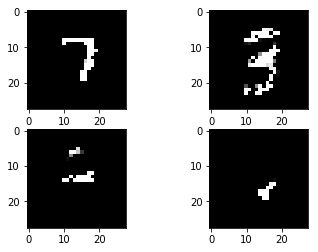

In [150]:
#Autoencoder
for epoch in range(201):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')
        
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})])
# print sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
# fig, ax = plt.subplots(nrows=2, ncols=2)
# for i,row in enumerate(ax):
#     for j,col in enumerate(row):
#         ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

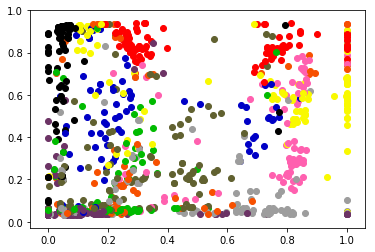

In [152]:
nums_scatter = sess.run(layer3.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)